<a href="https://colab.research.google.com/github/Upasana1503/Cryptonite_task/blob/main/Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score


In [15]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/train.csv')
df.shape

(1460, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
drop_cols = [col for col in df.columns if df.notnull().sum()[col]<292]
print(drop_cols)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
for col in drop_cols:
  df.drop(col,axis=1,inplace=True)
df.shape

(1460, 77)

In [19]:
cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]

for col in cols_with_nan:
  print(col,df[col].isna().sum())

LotFrontage 259
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


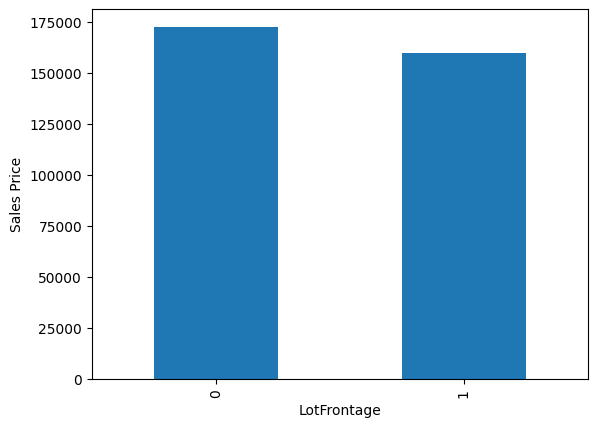

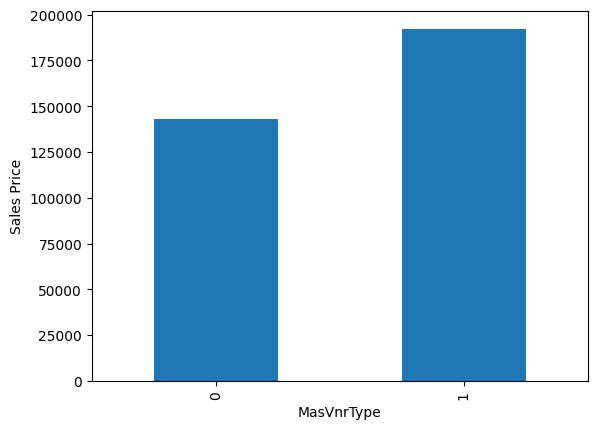

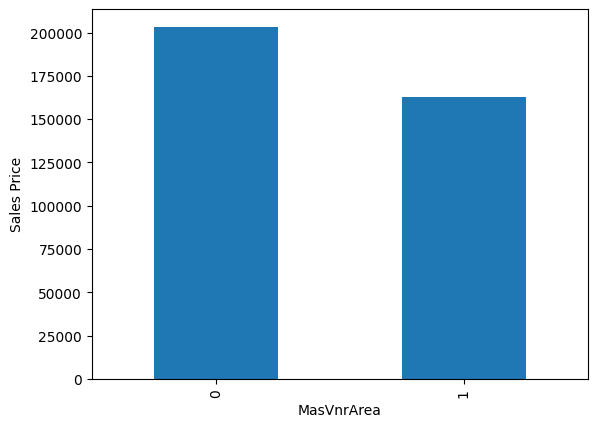

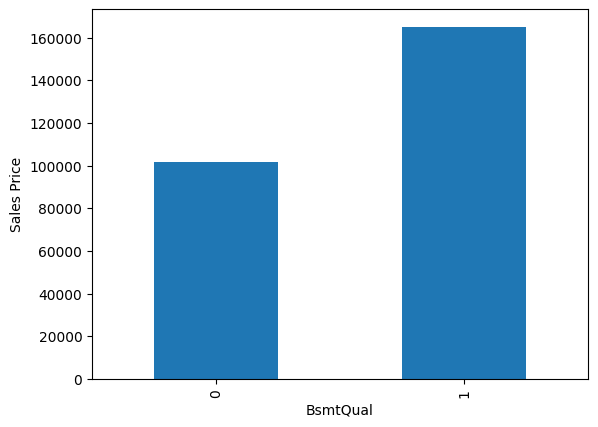

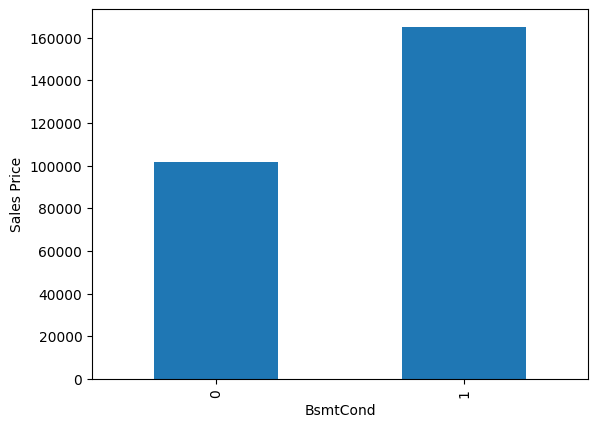

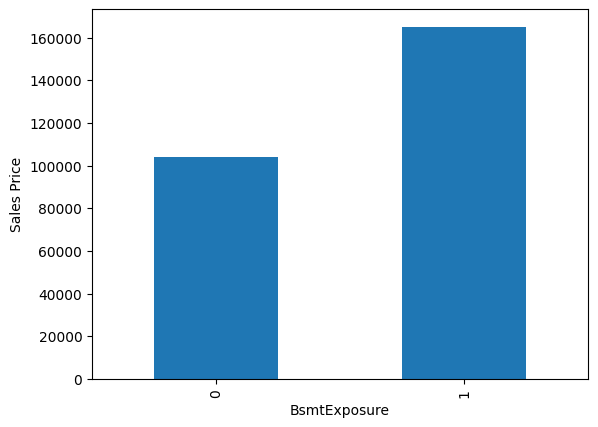

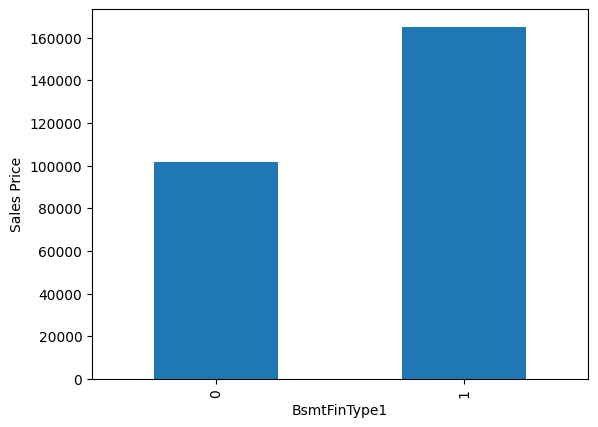

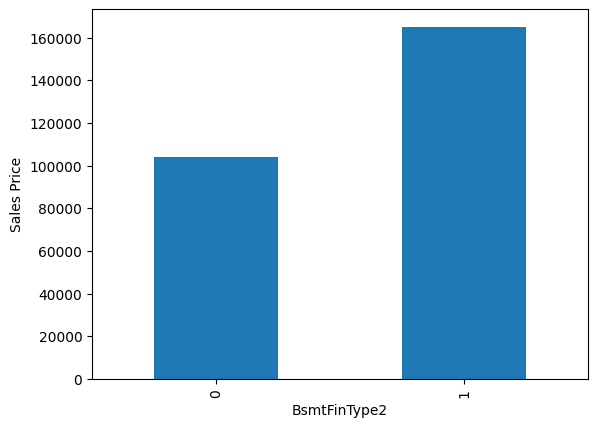

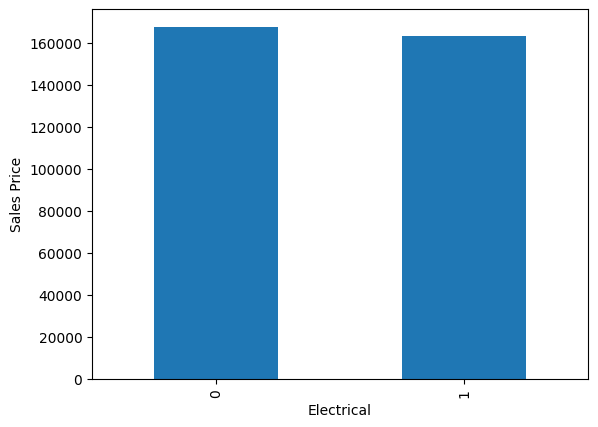

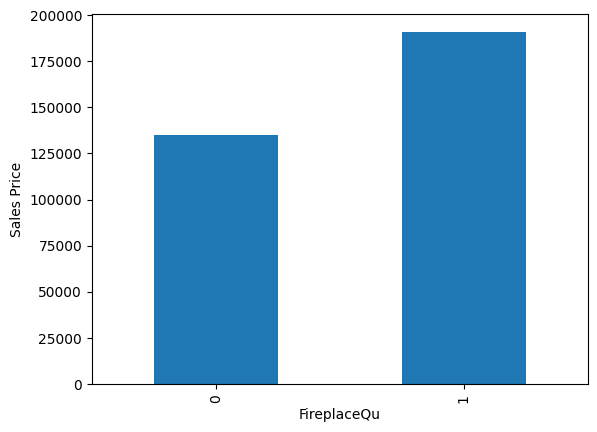

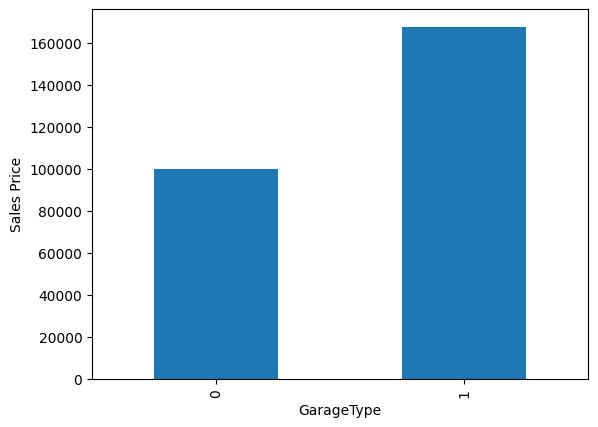

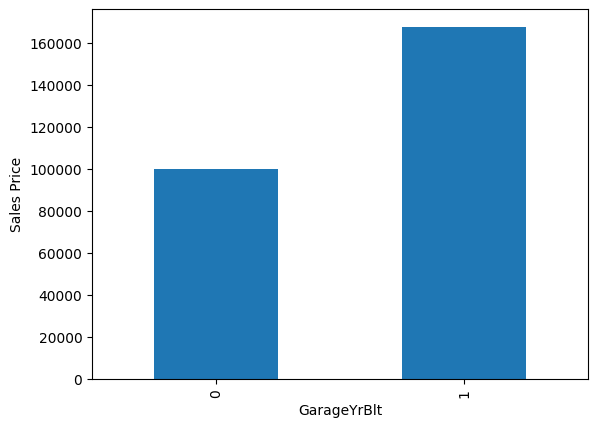

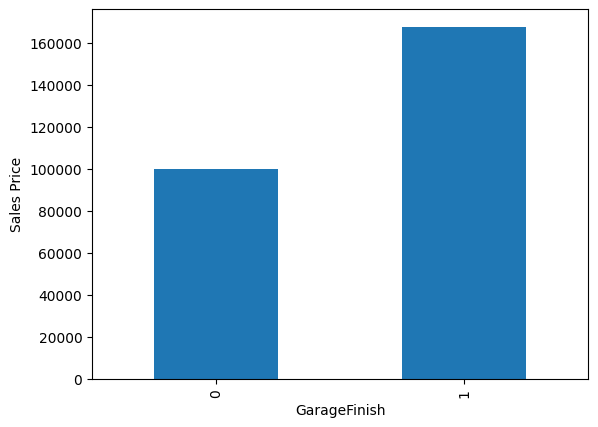

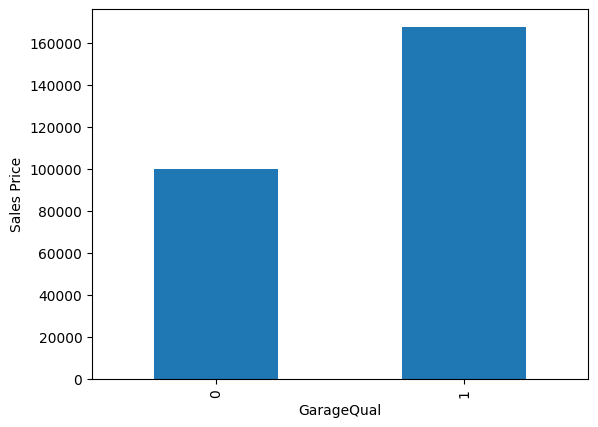

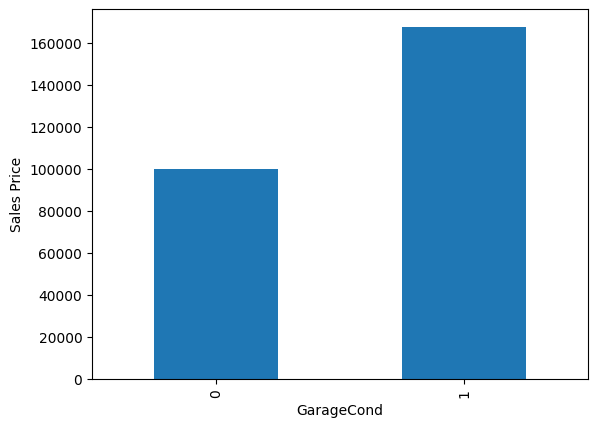

In [20]:
labels = [0,1]
for col in cols_with_nan:
  df[col] = np.where(df[col].isnull(),0,1)
  df.groupby(col)['SalePrice'].median().plot.bar()
  plt.xlabel(col)
  plt.xticks(labels)
  plt.ylabel('Sales Price')
  plt.show()

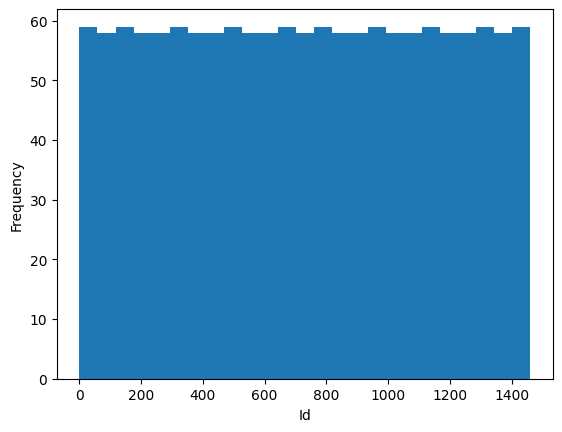

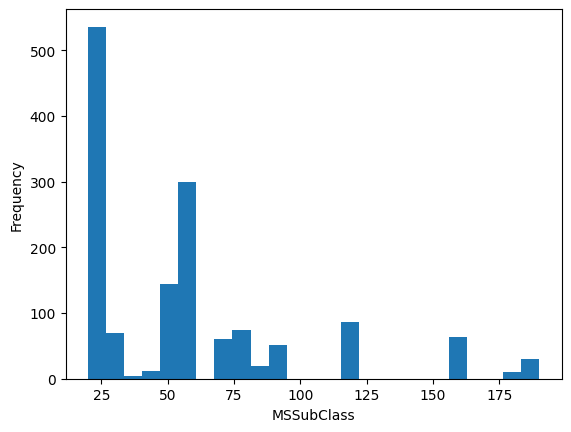

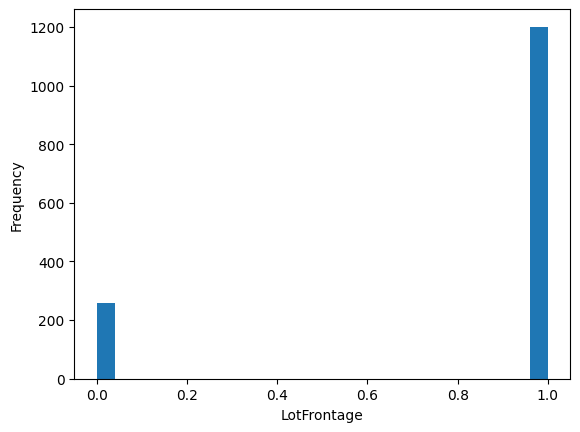

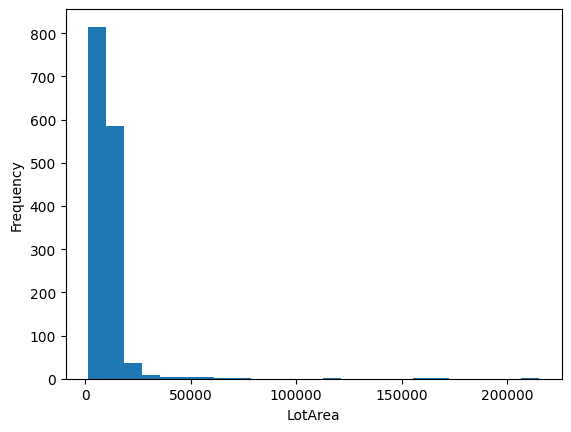

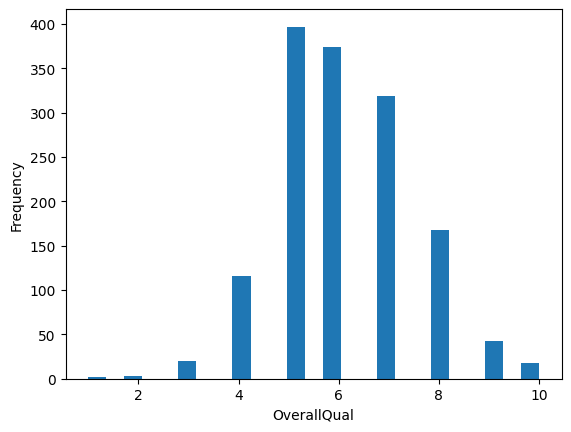

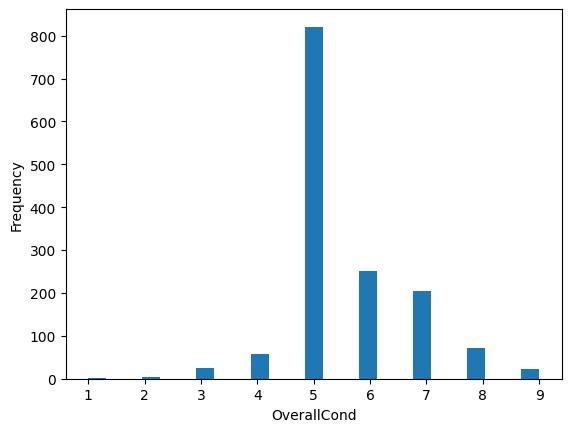

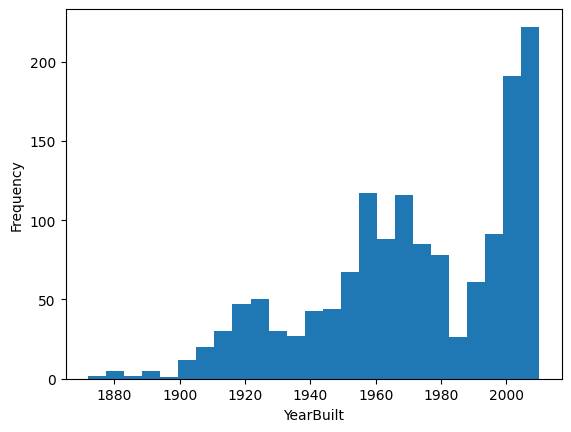

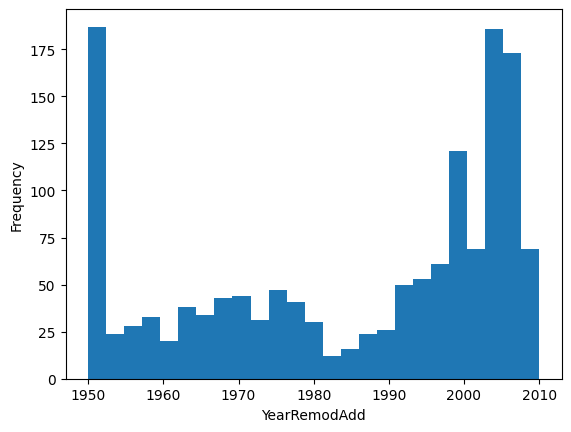

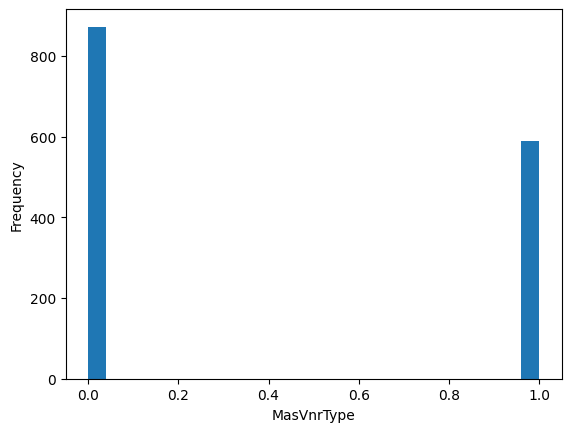

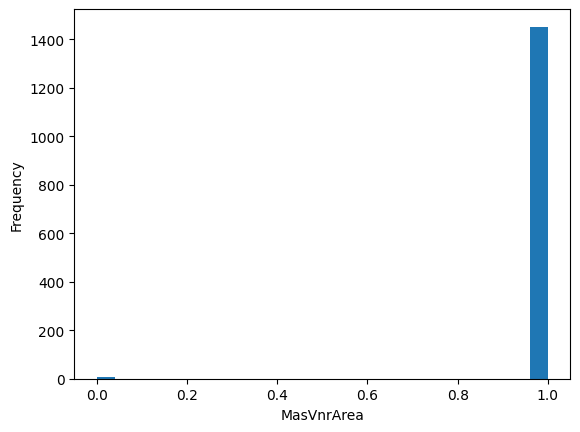

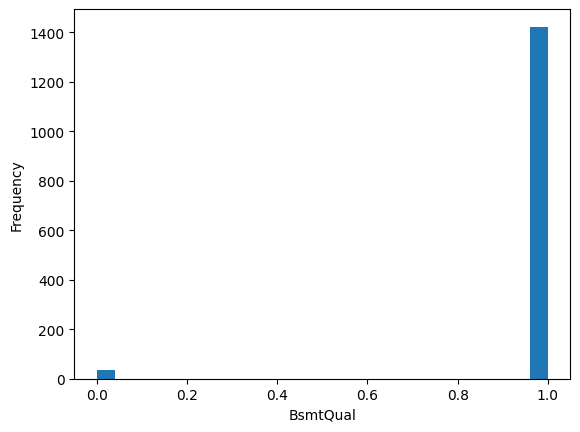

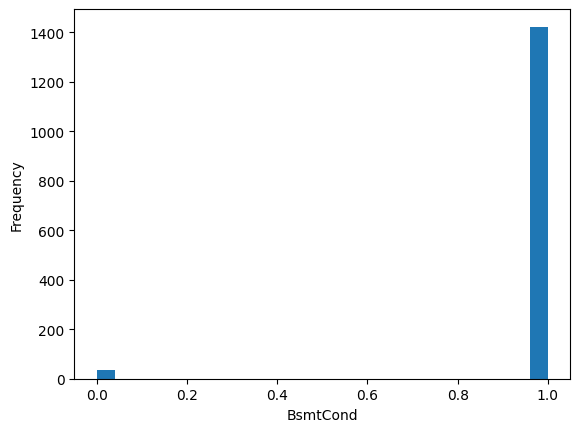

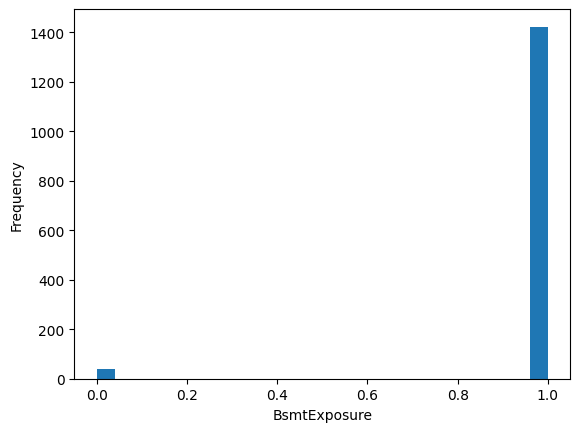

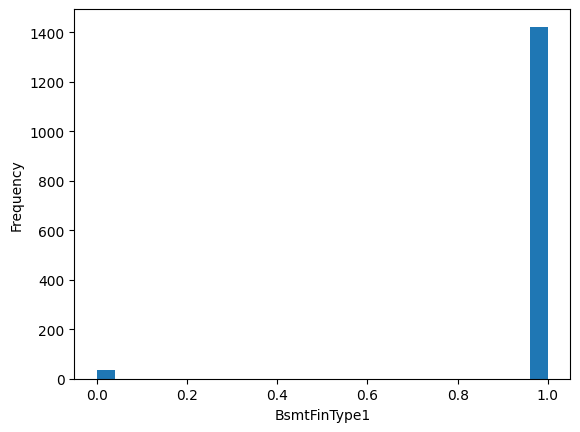

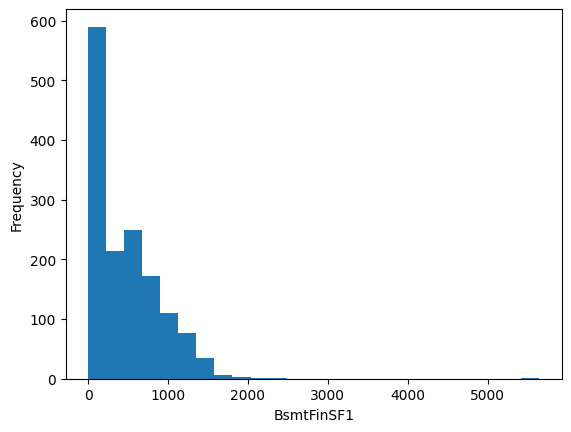

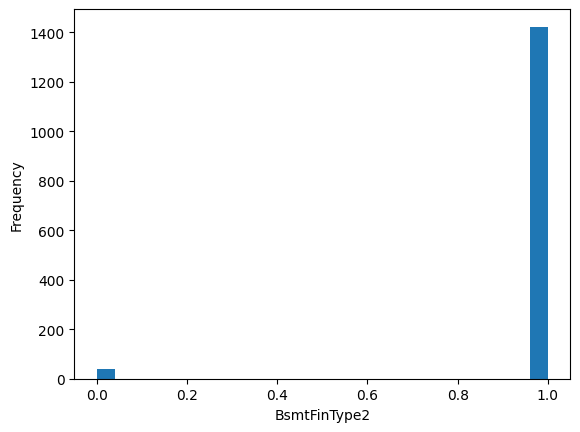

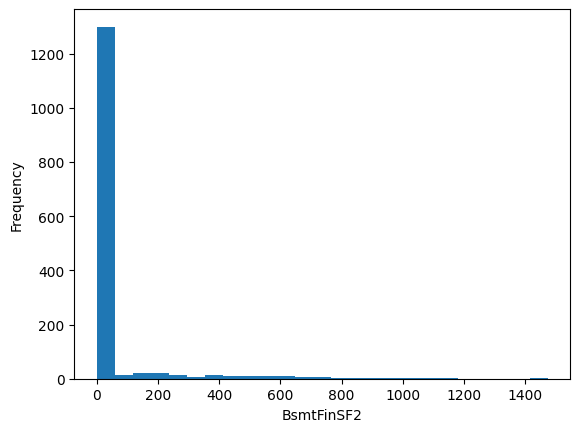

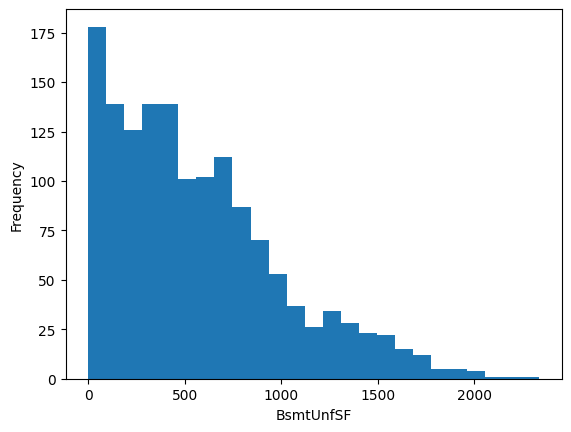

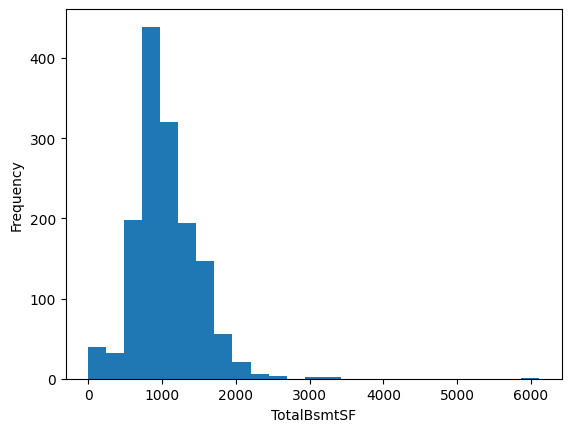

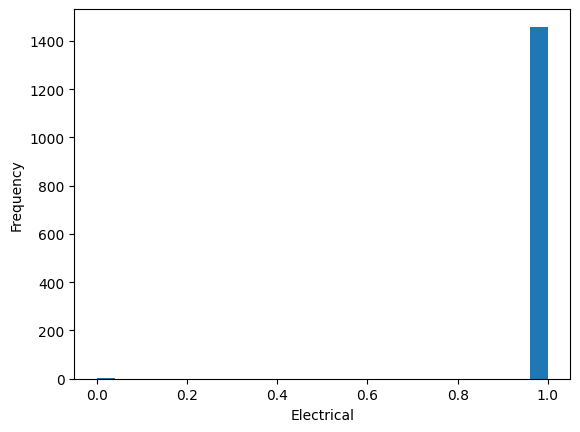

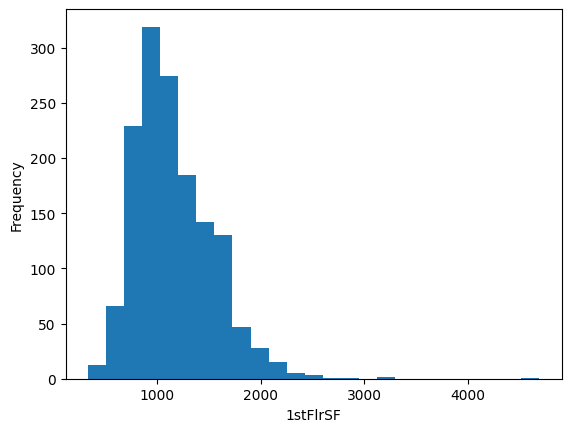

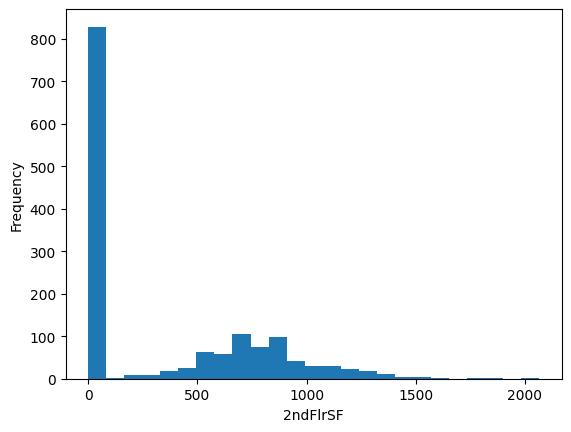

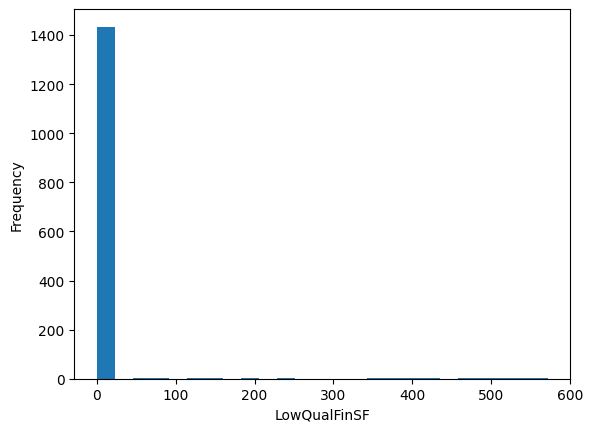

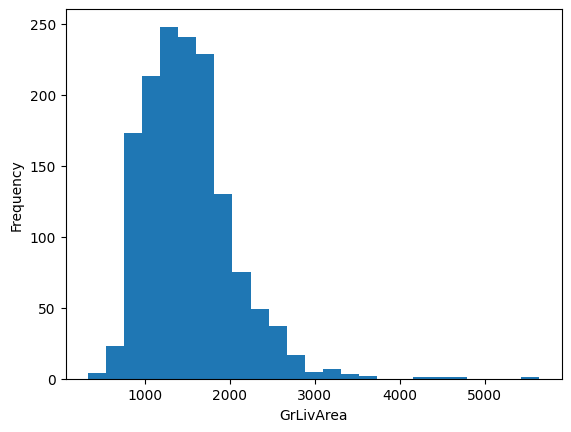

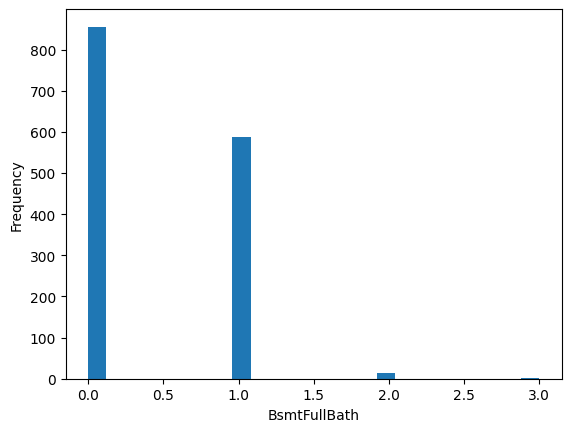

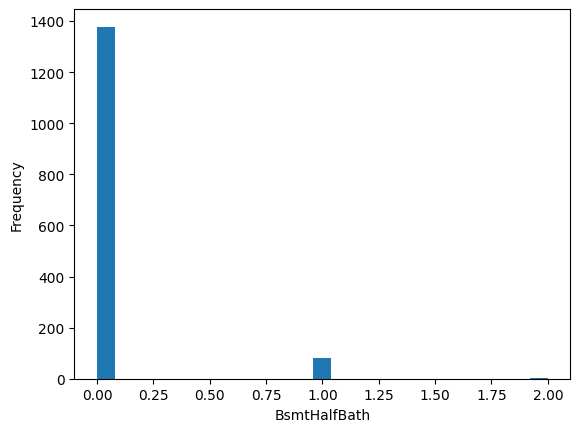

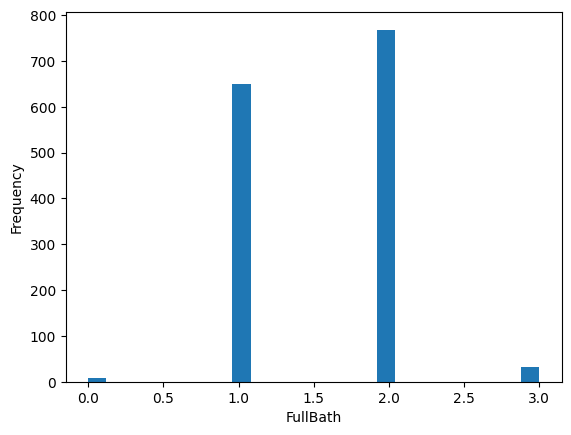

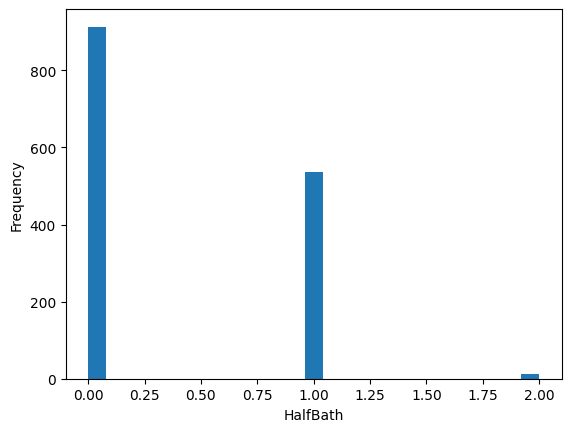

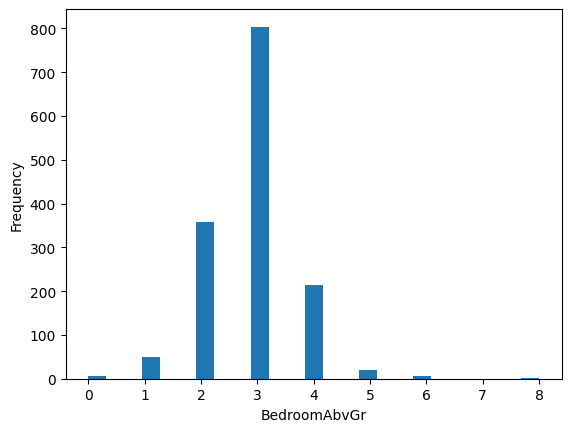

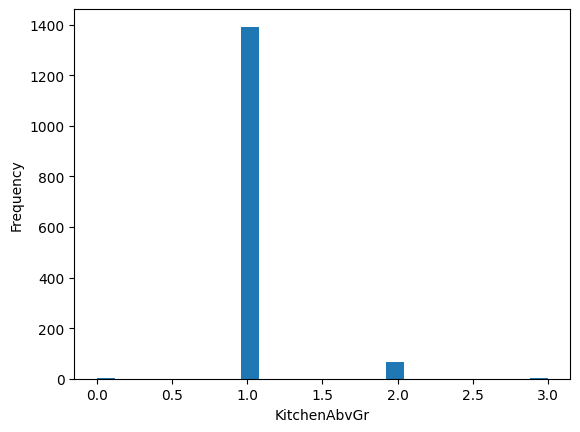

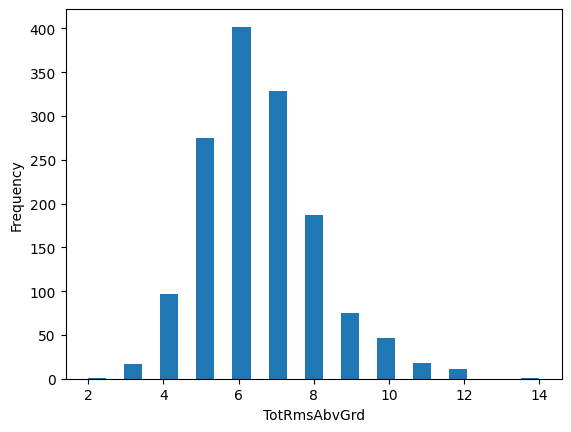

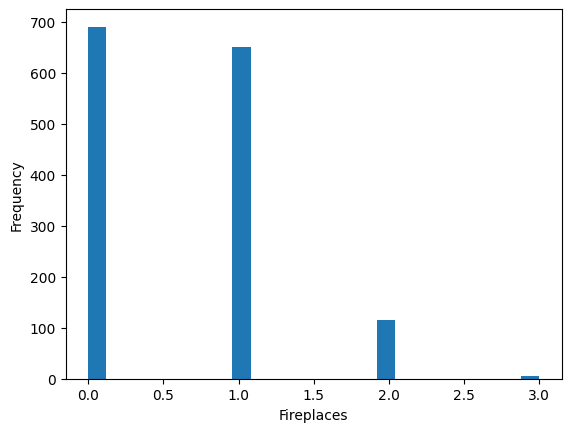

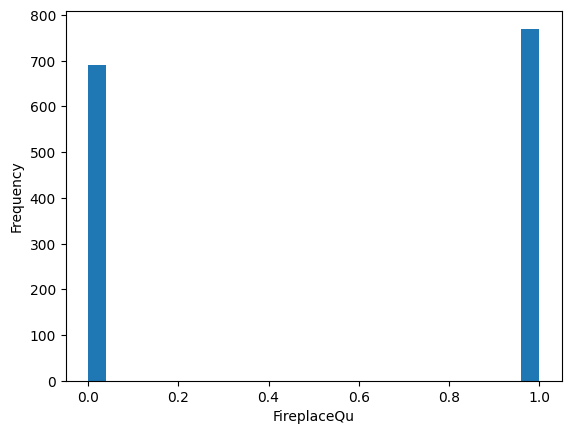

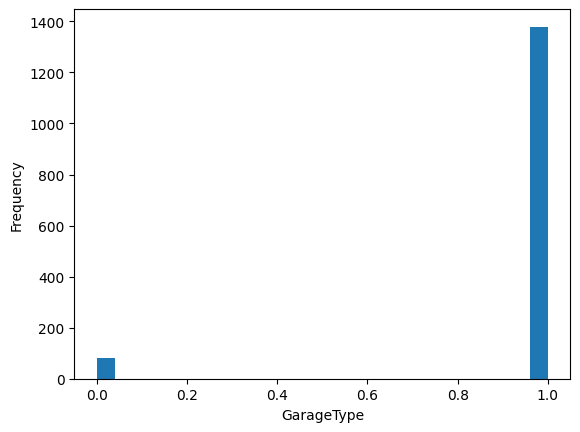

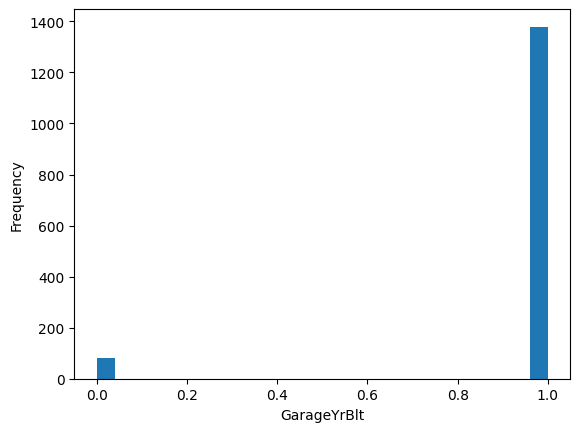

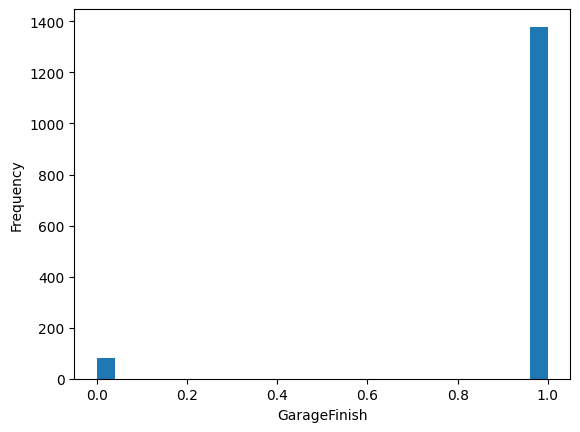

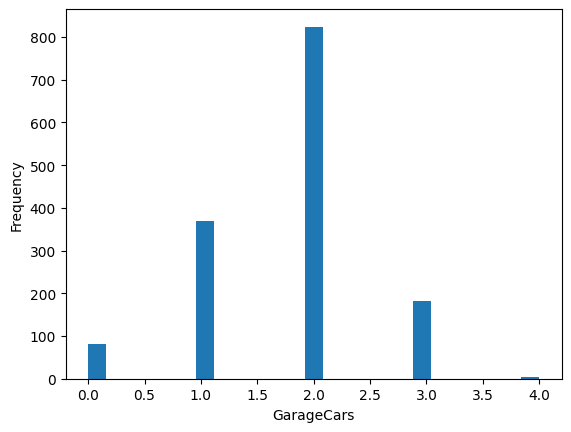

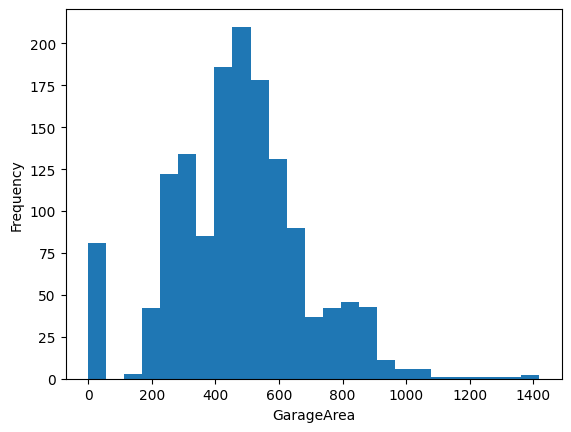

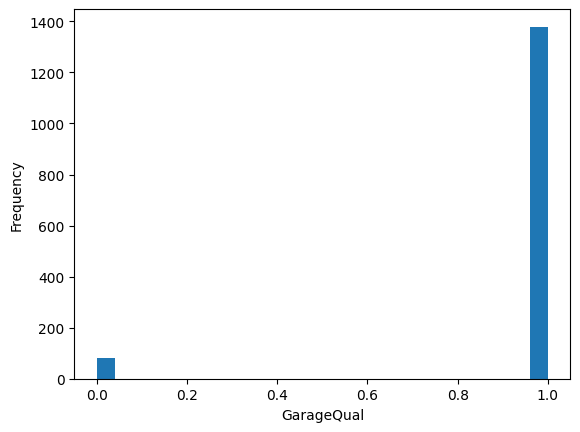

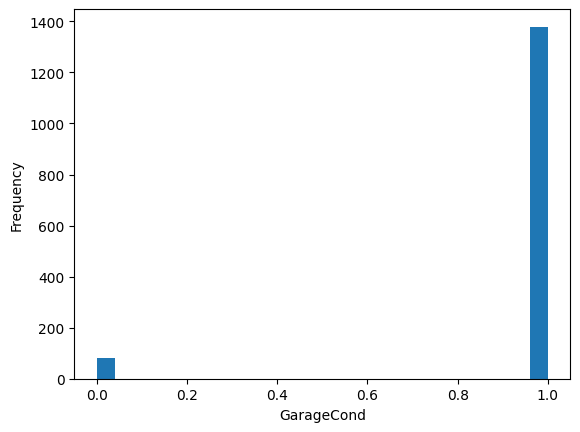

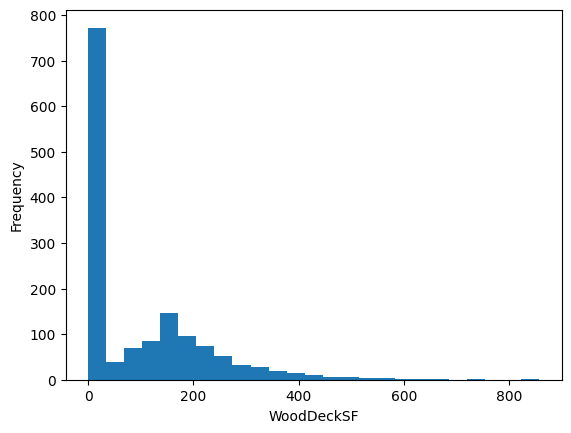

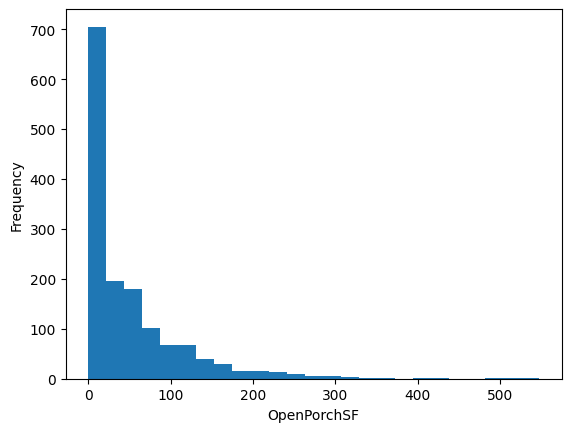

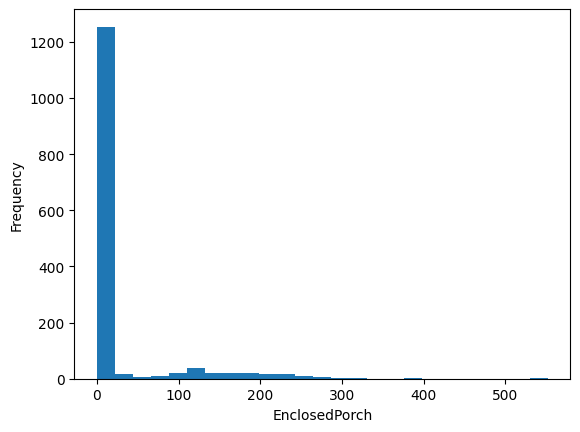

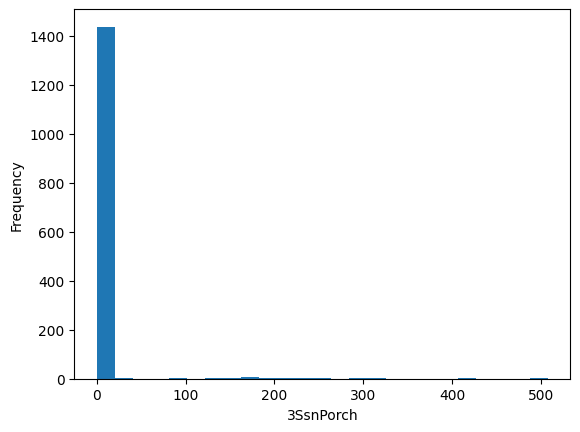

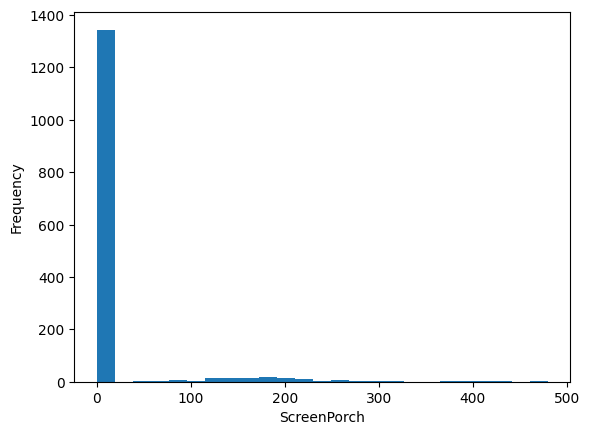

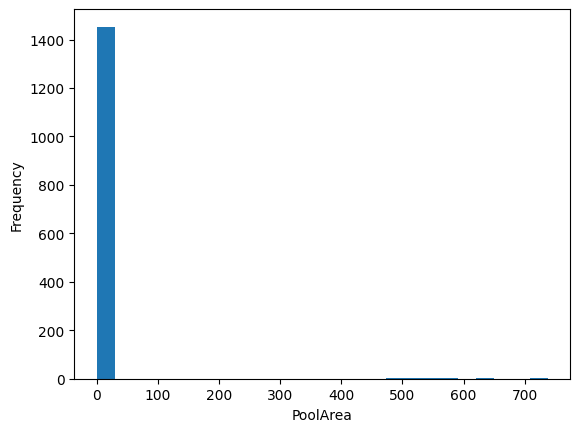

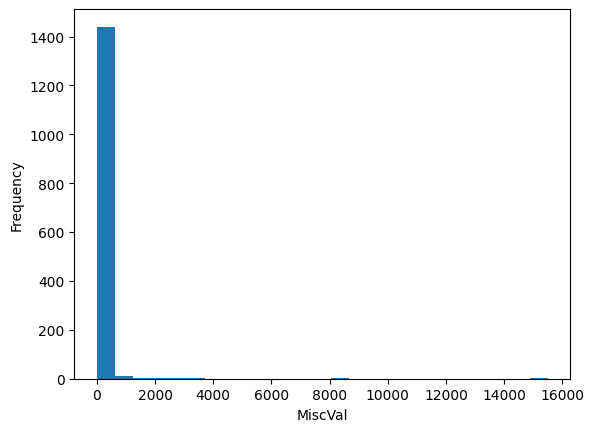

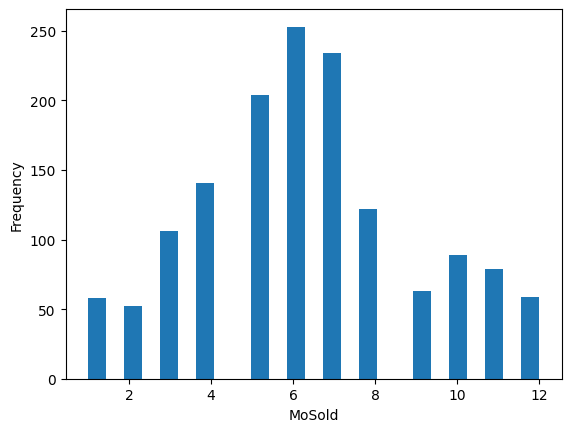

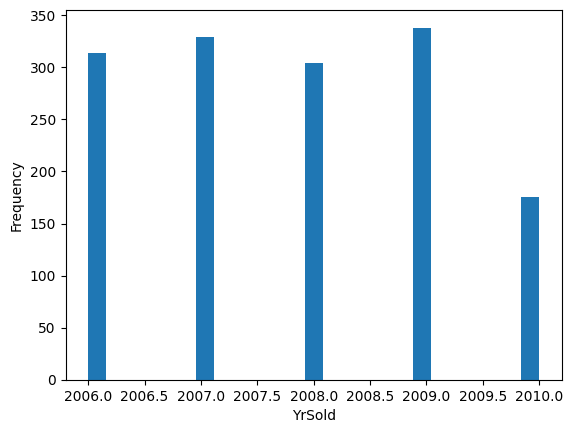

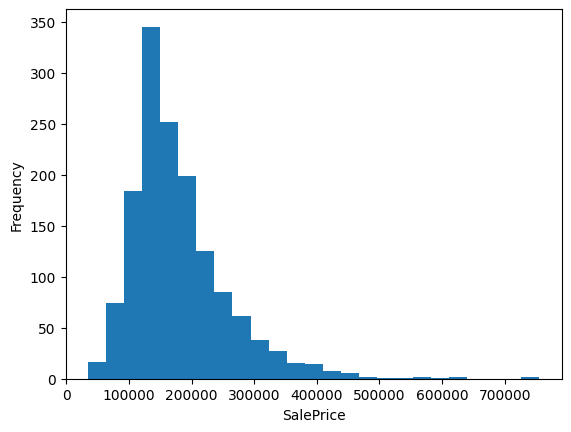

In [21]:
num_cols = [col for col in df.columns if df[col].dtype !='O']
for col in num_cols:
  plt.hist(df[col],bins=25)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [22]:

cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]
numeric_cols_with_nan = [column for column in cols_with_nan  if df[col].dtype != 'O']
for column in numeric_cols_with_nan:
    df[column] = df[column].fillna(df[column].median())


cols_with_object_values = [col for col in df.columns if df[col].dtype == 'O']
cols_with_nan = [col for col in cols_with_object_values if df[col].isna().any()]
for column in cols_with_nan:
    df[column] = df[column].fillna(df[column].mode()[0])



In [23]:
x = df.iloc[:,:-1]
y = df.SalePrice

In [24]:
ohe = OneHotEncoder()
x = ohe.fit_transform(x).toarray()
x = x[:,1:]

In [25]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.823592640656994
